<a href="https://colab.research.google.com/github/ShivamAryaJha/InvoiceForm-Text-Extraction-via-PyTesseract/blob/main/Borders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!sudo apt install tesseract-ocr
!pip install pytesseract

In [ ]:
import numpy as np
import cv2
import imutils
from skimage.filters import threshold_local
import matplotlib.pyplot as plt
import string
import pytesseract
from pytesseract import Output
import PIL as Image
import os
from google.colab.patches import cv2_imshow
import csv

3156   2258
2258 1129


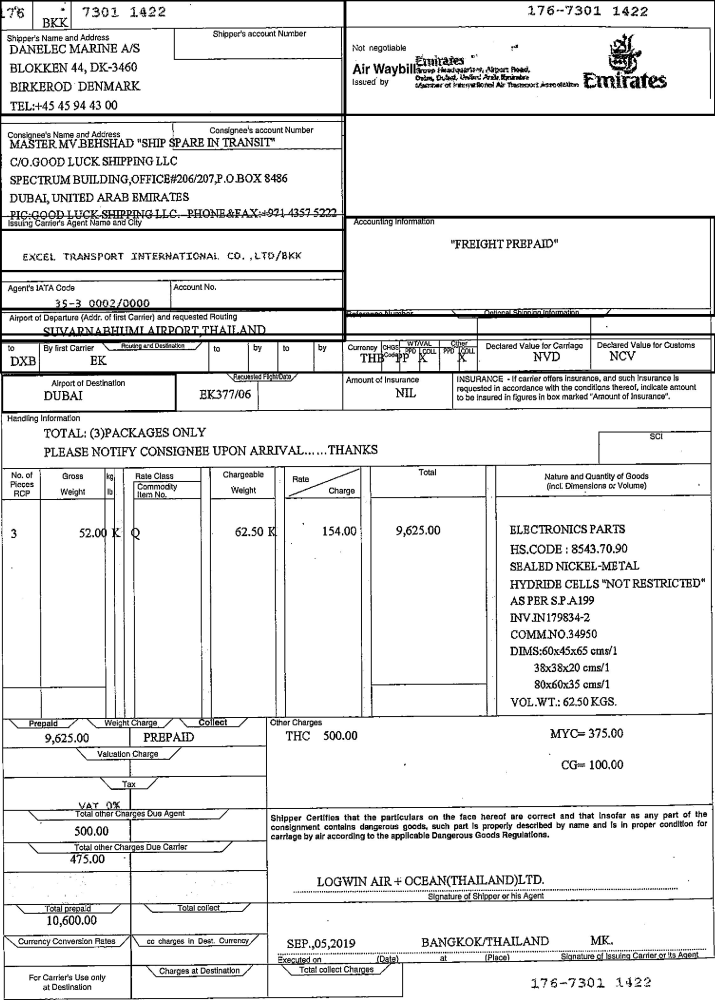

In [ ]:
first =  cv2.imread("/content/pdf2.jpg")
img =  first.copy()
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

ret,gray = cv2.threshold(gray,210,255,cv2.THRESH_BINARY)
kernel = np.ones((7, 7))
gray = cv2.erode(gray, kernel, iterations=1) 
gray = cv2.dilate(gray, kernel, iterations=1)
gray = cv2.GaussianBlur(gray, (5, 5), 0)

thresh_inv = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)[1]

# Blur the image
blur = cv2.GaussianBlur(thresh_inv,(1,1),0)
thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)[1]

# find contours
contours = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[0]

mxarea = 0

mask = np.ones(img.shape[:2], dtype="uint8") * 255
for c in contours:
    # get the bounding rect
    x, y, w, h = cv2.boundingRect(c)
    if w*h>1000:
        cv2.rectangle(mask, (x, y), (x+w, y+h), (0, 0, 255), -1)
        if w*h > mxarea:
            mxarea = w*h
            X, Y, W, H = x, y, w, h

res_final = cv2.bitwise_and(img, img, mask=cv2.bitwise_not(mask))

cut_out = first[Y: Y+H, X: X+W]
img = cut_out .copy()

#img = cv2.fastNlMeansDenoisingColored(img,None,10,10,7,21)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#ret,img = cv2.threshold(img,210,255,cv2.THRESH_BINARY)

h, w = img.shape
print(h, " ", w)
img = cv2.rectangle(img, (w//2 - 40, w//7 - 10), (w, 2*w//7 + 40), (255, 255, 255), -1)

crops = []
crops.append(img[0 : w//7 + 40, 0 : w//2 - 40])
crops.append(img[0: w//7 + 40, w//2 - 40:w])
crops.append(img[ w//7 + 40:2*w//7 + 80, 0:w//2 - 40])
crops.append(img[2*w//7 + 80 : 2*w//7 + 210, 0 : w//2 - 40])
crops.append(img[2*w//7 + 210:2*w//7 + 330, 0:w//2 - 40])
crops.append(img[2*w//7 + 330 : 2*w//7 + 430, 0 : w//2 - 40])
crops.append(img[2*w//7 + 40 : 2*w//7 + 350, w//2 - 40 : w])
crops.append(img[2*w//7 + 410 : 2*w//7 + 530, 0 : w])

img = cv2.rectangle(img, (0, 0), (w//2 - 40, w//7 + 40), (0, 0, 0), 7)
img = cv2.rectangle(img, (w//2 - 40, 0), (w, w//7 + 40), (0, 0, 0), 5)
img = cv2.rectangle(img, (0, w//7 + 40), (w//2 - 40, 2*w//7 + 80), (0, 0, 0), 5)
img = cv2.rectangle(img, (0, 2*w//7 + 80), (w//2 - 40, 2*w//7 + 210), (0, 0, 0), 5)
img = cv2.rectangle(img, (0, 2*w//7 + 210), (w//2 - 40, 2*w//7 + 330), (0, 0, 0), 5)
img = cv2.rectangle(img, (0, 2*w//7 + 330), (w//2 - 40, 2*w//7 + 430), (0, 0, 0), 8)
img = cv2.rectangle(img, (w//2 - 40, 2*w//7 + 40), (w, 2*w//7 + 350), (0, 0, 0), 8)

img = cv2.rectangle(img, (0, 2*w//7 + 410), (w, 2*w//7 + 530), (0, 0, 0), 5)

print(w, w//2)
cv2_imshow( imutils.resize(img, height = 1000))

In [ ]:
text = []
str =  ""
for i in crops:
  str = pytesseract.image_to_string(i, config = '--oem 3 --psm 4')
  text.append(str)
  print(str)
  print("----------------------------------------------------------")

76 | *| 7301 1422 —

78] pace] 7302 2822
Shipper's Name and Address Shipper's account Number
DANELEC MARINE A/S

BLOKKEN 44, DK-3460
BIRKEROD DENMARK
TEL:+45 45 94 43 00

 

----------------------------------------------------------
L76-7301 L422

Not negotiaile *

Eynivaies

Air Waybilkicse seas Feastaaartend, Azer: Bagel,

am
Issued by tance ot See Vacwenicl a A Paeeeoct Asn ateliees crmoirates

 

----------------------------------------------------------
J rp
Consignee's Name and Address me |
MASTE R MV BEHSHAD "SHIP SPARE IN TRANSIT"

C/0.GOOD LUCK SHIPPING LLC
SPECTRUM BUILDING, OFFICE #206/207,P .0 BOX 8486
DUBAI, UNITED ARAB EMIRATES

 

Gare Fate Agent Name and City ee

----------------------------------------------------------
EXCEL TRANSPORT INTERNATIONAL CO. ,LTO/BKK

 

----------------------------------------------------------
nT
85-3 9002/0000

----------------------------------------------------------
Airport of Departure (Addr. of first Garrier) and requested Rout

In [ ]:
new_text = []
special = [']', '[', '|', '=', '\\', '.', '-', '»','«', '!', '*']
itr = 0
for block in text:
  flag = 0
  lines = block.splitlines()
  emp = ""
  for line in lines:
    flag = 0
    for j in line:
      if ord(j) >= 48:
        flag = 1
        break
    if flag == 0:
      continue

    words = line.split()
    #print(words)
    for w in words:
      flag = 1
      for k in w:
        if ord(k) >= 97 and ord(k) <= 122 and itr != 1:
          flag = 0
          break
      if flag == 1:
        emp = emp + " " + w
    emp = emp + "\n"
  #print(emp)
  new_text.append(emp)
  itr = itr+1  

In [ ]:
for x in new_text:
  for i in special:
    x = x.replace(i, '')
    x = x.replace("\n\n", "\n")
  print(x)
  print("----------------------------------------------------")


 081BKK5245 0661
 GGD TRADING (THAILAND) CO LTD
 10 PETCHKASEM 69 YAK 11, LAK 2,
 BANGKHAE, BANGKOK 10160 THAILAND
 TEL : +66 2 444 0240

----------------------------------------------------
 081BKK5245 0661
 Not reacts POANTAS AIRWAYS LIMITED
 Air WaybBN 16 009 661 9
 issued by 6 QANTAS CENTRE, MASOOY) NSW 2020,
 AUSTRALIA

----------------------------------------------------

 FLORA NETWORK PTY LT
 49B HIGH STREET,
 CARLTON, SYDNEY NSW 2218
 AUSTRALIA
 PHONE:+61416 988 840
 

----------------------------------------------------
 FETA FREIGHT SYSTEMS (THAILAND) CO,LTD
 BANGKOK /THAILAND

----------------------------------------------------
 IATA
 ‘3538930

----------------------------------------------------
 FUE OE RARE S AENSABAE GSE CUES NEAT ERIS 7 SRS ONE
 ITN'L AIRPORT

----------------------------------------------------

 “FREIGHT PREPAID"

----------------------------------------------------
 _/ 
 QF THE  NVD
 1 INGLIQANQE ~

--------------------------------------------------